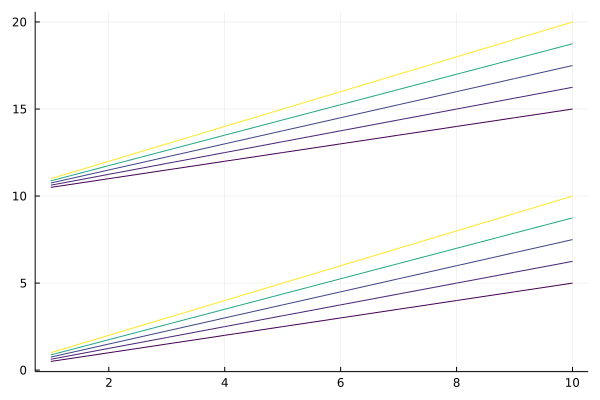

In [105]:
using DataFrames, StatsPlots, Distributions 
x = 1:10
linear(b0, b1, x) = b0 + b1*x
B0 = [0, 10]
B1 = range(.5, stop=1, length=5)
y = [linear.(b0, b1, x) for b0 in B0 for b1 in B1] # `b1 in B1` and `b0 in B0` exchanged
y = vcat(y...)
df = DataFrame(group = repeat(0:1,inner=50), slope = repeat(repeat(B1, inner=10), outer =2),
    x = repeat(x,outer=10),  y = y)
@df df plot(:x, :y, group = (:group,:slope), legend=false,
    color = cgrad(:viridis,:slope), line_z=:slope) # palette -> color, `line_z = :slope` added

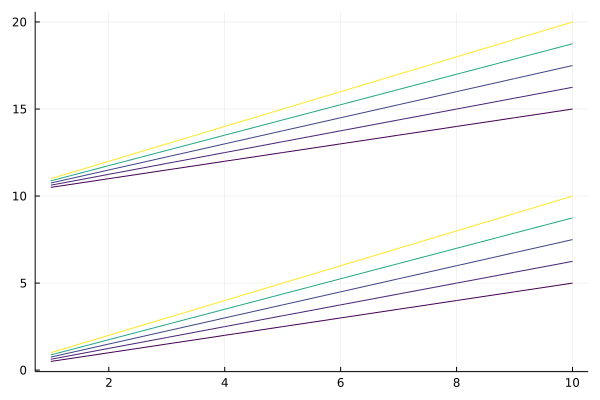

In [106]:
using DataFrames, StatsPlots, Distributions 
x = 1:10
linear(b0, b1, x) = b0 + b1*x
B0 = [0, 10]
B1 = range(.5, stop=1, length=5)
y = [linear.(b0, b1, x) for b0 in B0 for b1 in B1] # `b1 in B1` and `b0 in B0` exchanged
y = vcat(y...)
df = DataFrame(group = repeat(0:1,inner=50), slope = repeat(repeat(B1, inner=10), outer =2),
    x = repeat(x,outer=10),  y = y)
@df df plot(:x, :y, group = (:group,:slope), legend=false,
    color = cgrad(:viridis,:slope), line_z = :slope) # palette -> color, `line_z = :slope` added

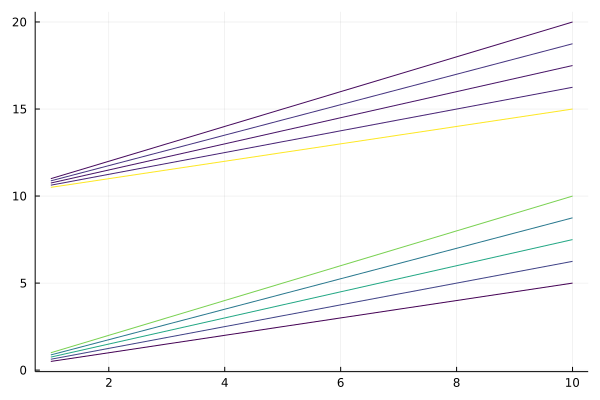

In [89]:
using DataFrames, StatsPlots, Distributions 
x = 1:10
linear(b0, b1, x) = b0 + b1*x
B0 = [0,10]
B1 = range(.5, stop=1, length=5)
y = [linear.(b0, b1, x) for b1 in B1 for b0 in B0]
y = vcat(y...)
df = DataFrame(group = repeat(0:1,inner=50), slope = repeat(repeat(B1, inner=10), outer =2),
    x = repeat(x, outer=10),  y = y)
@df df plot(:x, :y, group = (:group,:slope), legend=false, palette = cgrad(:viridis,:slope))

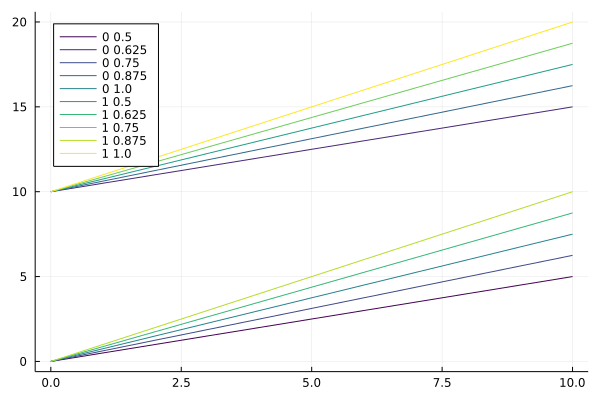

In [62]:
using DataFrames, StatsPlots, Distributions 
x = 0:10
linear(b0, b1, x) = evalpoly(x, (b0, b1))
B0 = [0, 10]
B1 = range(0.5, 1; length=5)
ytmp = [linear.(b0, b1, x) for b1 in B1 for b0 in B0]
y = vcat(ytmp...)
df = DataFrame(
    group = repeat(0:1, inner=55),
    slope = repeat(repeat(B1, inner=11), outer=2),
    x = repeat(x, outer=10),
    y = y)
color = (@df df cgrad(:viridis, :slope))[round.(Int, range(1, 256; length=10))]'
@df df plot(:x, :y; legend=:topleft,
    group = (:group, :slope),
    color = color
)

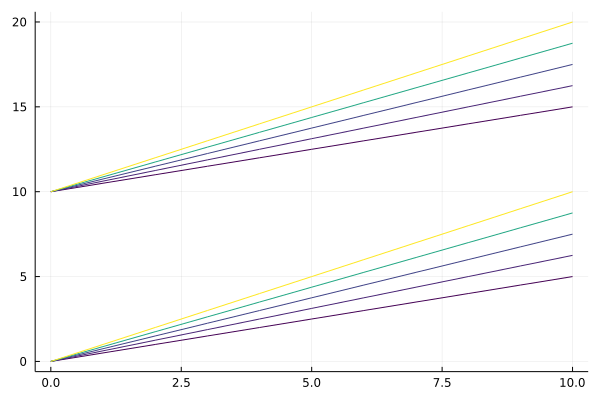

In [103]:
using DataFrames, StatsPlots, Distributions 
x = 0:10
linear(b0, b1, x) = evalpoly(x, (b0, b1))
B0 = [0, 10]
B1 = range(0.5, 1; length=5)
ytmp = [linear.(b0, b1, x) for b0 in B0 for b1 in B1]
y = vcat(ytmp...)
df = DataFrame(
    group = repeat(0:1, inner=55),
    slope = repeat(repeat(B1, inner=11), outer=2),
    x = repeat(x, outer=10),
    y = y)
@df df plot(:x, :y; legend=false,
    group = (:slope, :group),
    color = cgrad(:viridis, :slope),
    line_z = :slope)

In [76]:
@macroexpand @df df plot(:x, :y; #legend=false,
    group = (:group, :slope),
    palette = cgrad(:viridis, zip(zeros(110), :slope)))

:(((var"##601"->begin
          ((var"##group#602", var"##slope#603", var"##viridis#604", var"##slope#605", var"##x#606", var"##y#607"), var"##608") = (StatsPlots).extract_columns_and_names(var"##601", :group, :slope, :viridis, :slope, :x, :y)
          (StatsPlots).add_label(["x", "y"], plot, var"##x#606", var"##y#607"; group = (var"##group#602", var"##slope#603"), palette = cgrad(var"##viridis#604", zip(zeros(110), var"##slope#605")))
      end))(df))

In [14]:
ytmp

10-element Vector{Vector{Float64}}:
 [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
 [10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0]
 [0.0, 0.625, 1.25, 1.875, 2.5, 3.125, 3.75, 4.375, 5.0, 5.625, 6.25]
 [10.0, 10.625, 11.25, 11.875, 12.5, 13.125, 13.75, 14.375, 15.0, 15.625, 16.25]
 [0.0, 0.75, 1.5, 2.25, 3.0, 3.75, 4.5, 5.25, 6.0, 6.75, 7.5]
 [10.0, 10.75, 11.5, 12.25, 13.0, 13.75, 14.5, 15.25, 16.0, 16.75, 17.5]
 [0.0, 0.875, 1.75, 2.625, 3.5, 4.375, 5.25, 6.125, 7.0, 7.875, 8.75]
 [10.0, 10.875, 11.75, 12.625, 13.5, 14.375, 15.25, 16.125, 17.0, 17.875, 18.75]
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
 [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]

In [6]:
df

,group,slope,x,y
,Int64,Float64,Int64,Float64
1,0,0.5,1,0.5
2,0,0.5,2,1.0
3,0,0.5,3,1.5
4,0,0.5,4,2.0
5,0,0.5,5,2.5
6,0,0.5,6,3.0
7,0,0.5,7,3.5
8,0,0.5,8,4.0
9,0,0.5,9,4.5


In [22]:
@macroexpand @df df cgrad(:viridis, :slope)

:(((var"##409"->begin
          ((var"##viridis#410", var"##slope#411"), var"##412") = (StatsPlots).extract_columns_and_names(var"##409", :viridis, :slope)
          (StatsPlots).add_label(["viridis", "slope"], cgrad, var"##viridis#410", var"##slope#411")
      end))(df))

In [31]:
pal = @df df cgrad(:viridis, :slope)

In [26]:
StatsPlots.extract_columns_and_names(df, :viridis, :slope)

((:viridis, [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), (:group, :slope, :x, :y))

In [27]:
cgrad(:viridis)

In [58]:
[(@df df cgrad(:viridis, :slope))[round(Int, k)] for k in range(1, 256; length=10)]

In [56]:
(@df df cgrad(:viridis, :slope))[86]

In [67]:
pal

In [68]:
dump(pal)

PlotUtils.ContinuousColorGradient
  colors: ColorSchemes.ColorScheme{Vector{RGBA{Float64}}, String, String}
    colors: Array{RGBA{Float64}}((256,))
      1: RGBA{Float64}
        r: Float64 0.267004
        g: Float64 0.004874
        b: Float64 0.329415
        alpha: Float64 1.0
      2: RGBA{Float64}
        r: Float64 0.26851
        g: Float64 0.009605
        b: Float64 0.335427
        alpha: Float64 1.0
      3: RGBA{Float64}
        r: Float64 0.269944
        g: Float64 0.014625
        b: Float64 0.341379
        alpha: Float64 1.0
      4: RGBA{Float64}
        r: Float64 0.271305
        g: Float64 0.019942
        b: Float64 0.347269
        alpha: Float64 1.0
      5: RGBA{Float64}
        r: Float64 0.272594
        g: Float64 0.025563
        b: Float64 0.353093
        alpha: Float64 1.0
      ...
      252: RGBA{Float64}
        r: Float64 0.9553
        g: Float64 0.901065
        b: Float64 0.118128
        alpha: Float64 1.0
      253: RGBA{Float64}
        r: Fl

In [75]:
@df df identity(:grope)

:grope

In [87]:
df.slope |>print

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [88]:
df.group |> print

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]